# PICASSO'S - BUT FOR BOOKS

## Business Understanding

### 1.1 Overview
Books are one of the greatest invention of the humankind and the ability to transfer knowledge to a wider audience traversing timezones and even generations..

### 1.2 Problem Statement
However, one of the biggest drawbacks of finishing a good book is the tormentous hunt to find another book that was just as good, entertaining or as informative. Searching and scouring the internet for a good book could lead to insanity (not proven yet).

### 1.3 Proposed Solution
Designing a bespoke recommendation system could fix this issue post-haste. The recommendations would provide a number of suggestion based on your current read - leading to excitement and will to live even longer.

### 1.4 Objective
The main objective of this project is to create a Collaborative Filtering Recommendation System specifically - to create an array of interesting suggestions based on the user's input.

**Specific Objectives**
* To explore the Authors with the highest readership and highest ratings across time
* To identify the years with the most publications released
* To pinpoint the location of most of the readership
* To explore the Ratings and identify the distribution and books with highest mean rating
* To identify the Publishers and Authors publishing under their name

## 2.0 Data Understanding

The data was sourced from Kaggle. 

There are 3 csv files containing the 
* Books Dataset
* Users Dataset
* Ratings Dataset

The data is sufficient enough to do the analysis and model, but it would have been better to analyse the genres and other metadata concerning each book.

In [1]:
# Data Exploration
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scipy Sparse
from scipy.sparse import csr_matrix

# Modelling
from sklearn.neighbors import NearestNeighbors

# Pickle
import pickle

### 2.1 Data

The class below can load the data and return a dataframe. A dataframe can also be provided.

The class can also give some information about the dataset to give an understanding of the data.

In [2]:
class DataUnderstanding:
    def __init__(self, name, df='None'):
        self.df = df
        self.name = name
        
    def load_data(self, path):
        if self.df == 'None':
            self.df = pd.read_csv(path, sep=';', encoding='latin-1', on_bad_lines='skip', low_memory=False)
            self.df.head()
            
        return self.df
    
    def understanding(self):
        # Shape and Columns
        print(f"DATA UNDERSTANDING OF THE {self.name} Dataset")
        print("-" * 30)
                    
        # Info
        print("\n\nInfo")
        print("-"*5)
        self.df.info()
        
        print("\n\nSHAPE")
        print("-" * 5)
        print(f"The {self.name} dataset contains {self.df.shape[0]:,} records and {self.df.shape[1]} columns")
        print(f"The columns are { [str(col) for col in sorted(self.df.columns)] }")
        
        # Missing values 
        print("\n\nMISSING VALUES")
        print("-" * 15)
        print(f"Missing values in the {self.name} dataset: {self.df.isnull().sum().sum()}")
        
        if self.df.isnull().sum().sum() > 0:
            print("\nA deeper analysis of missing values")
            for feature, val in self.df.isnull().sum().items():
                if val > 0:
                    print(f" - {feature} has {val} missing values")
        
        # Missing values 
        print("\n\nDUPLICATES")
        print("-" * 15)
        print(f"Duplicate values in the {self.name} dataset: {self.df[self.df.duplicated()].sum().sum()}")
        
        # Data Types
        data_types = {}
        for dt in self.df.dtypes:
            if dt not in data_types:
                data_types[dt] = 1
            else:
                data_types[dt] += 1
                
        print("\n\nDATATYPES")
        print("-" * 15)
        print(f"Number of Features with {[dt for dt in list(data_types.keys())]} datatypes "\
          +f"are {[dt for dt in list(data_types.values())]} respectively")
        
        # Unique Values
        print("\n\nUNIQUE VALUES")
        print("-" * 15)
        for col in self.df.columns:
            print(f"\nNumber of unique values in the *{col.upper()}* feature are {self.df[col].nunique():,}")
            
            print(f"\nSome unique values in the {col.upper()} column:")
            if self.df[col].nunique() > 11:
                print(self.df[col].unique()[:5])
            else:
                print(self.df[col].unique())
                
            print(f"\nTop 10 Sample of the Distribution of the {col} column")
            print(self.df[col].value_counts()[:10])
            
        
        # Numerical Columns
        print("\n\nCOLUMNS")
        print("-" * 15)
        print("The Numerical Features are:")
        numerical_features = [col for col in self.df.select_dtypes(exclude='O')]
        if len(numerical_features) > 0:
            print(f"{ [col for col in numerical_features] }")
        else:
            print('None')
            
                
        # Categorical Columns
        print("\nThe Categorical Features are:")
        cat_features = [col for col in self.df.select_dtypes(include='O')]
        if len(cat_features) > 0:
            print(f"{ [col for col in cat_features] }")
        else:
            print('None')

#### 2.1.1 DATASET 1 - Books Data

In [3]:
books = DataUnderstanding(name='Books')
books_df = books.load_data(path='./data/BX-Books.csv')
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Data understanding of the books dataset
books.understanding()

DATA UNDERSTANDING OF THE Books Dataset
------------------------------


Info
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


SHAPE
-----
The Books dataset contains 271,360 records and 8 columns
The columns are ['Book-Author', 'Book-Title', 'ISBN', 'Image-URL-L', 'Image-URL-M', 'Image-URL-S', 'Publisher', 'Year-Of-Publication']


MISSING VALUES
---------------
Missing values in the Book

##### Comments on the Books Dataset
> * There are 271,360 unique values in the ISBN column and at the same time there are multiple entries of certain books such as `Selected Poems` or `Little Women` and yet there are no duplicates in the dataset. This may mean there are different Publishers or each new version was made into a different publication.
> * The Authors, Book-Titles and Publisher names would require streamlining in the Data Cleaning Section.

#### 2.1.2 DATASET 2 - Users Dataset

In [5]:
users = DataUnderstanding(name='Users')
users_df = users.load_data(path='./data/BX-Users.csv')
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Data understanding of the users dataset
users.understanding()

DATA UNDERSTANDING OF THE Users Dataset
------------------------------


Info
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


SHAPE
-----
The Users dataset contains 278,858 records and 3 columns
The columns are ['Age', 'Location', 'User-ID']


MISSING VALUES
---------------
Missing values in the Users dataset: 110762

A deeper analysis of missing values
 - Age has 110762 missing values


DUPLICATES
---------------
Duplicate values in the Users dataset: 0.0


DATATYPES
---------------
Number of Features with [dtype('int64'), dtype('O'), dtype('float64')] datatypes are [1, 1, 1] respectively


UNIQUE VALUES
---------------
Number of unique values in the *User-ID

##### Comments on the User Dataset
> * All the entries in the dataset are unique and do not contain any duplicates

#### 2.1.3 DATASET 3 - Ratings Dataset

In [7]:
rating = DataUnderstanding(name='Rating')
ratings_df = rating.load_data(path='./data/BX-Book-Ratings.csv')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# Data understanding of the Ratings dataset
rating.understanding()

DATA UNDERSTANDING OF THE Rating Dataset
------------------------------


Info
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


SHAPE
-----
The Rating dataset contains 1,149,780 records and 3 columns
The columns are ['Book-Rating', 'ISBN', 'User-ID']


MISSING VALUES
---------------
Missing values in the Rating dataset: 0


DUPLICATES
---------------
Duplicate values in the Rating dataset: 0


DATATYPES
---------------
Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 1] respectively


UNIQUE VALUES
---------------
Number of unique values in the *User-ID* feature are 105,283

Some unique values in the User-ID column:
[276725 276726 27

##### Comments on the Ratings Dataset
> * With over 1 million records and only 105,283 unique users, we can observe that on average each user has read near 10 books.
> * Each unique ISBN book has been rated over 3 times in the dataset
> * Ratings range from 0 to 10 - with the zeros holding over half the records in the dataset. 

### 2.2 Observations
> The important columns names in each dataset would need reformating in the Data Cleaning section

> Records with missing values in the Book DataFrame would have to be removed while the `Age` column in the Users DataFrame would have to be dropped.

> Reformat the string values of features to ensure consistency.

***

## 3.0 Data Cleaning

### 3.1 Validity

#### 3.1.1 Change column names

In [9]:
# Rename columns in the books_df
books_df.rename(columns={
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-L':'img_url',
}, inplace=True)

In [10]:
# Check
books_df.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'Image-URL-S',
       'Image-URL-M', 'img_url'],
      dtype='object')

In [11]:
# Rename columns in the users_df
users_df.rename(columns={
    'User-ID': 'user_id',
}, inplace=True)

# Check
users_df.columns

Index(['user_id', 'Location', 'Age'], dtype='object')

In [12]:
# Rename columns in the ratings_df
ratings_df.rename(columns={
    'User-ID': 'user_id',
    'Book-Rating': 'rating',
}, inplace=True)

# Check
ratings_df.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

#### 3.1.2 Wronly placed variables

In [13]:
# Some records have wrong values in the 'year' category
wrong_values = [year for year in books_df['year'].unique() if len(year) > 4]
wrong_values

['DK Publishing Inc', 'Gallimard']

In [14]:
# The individual records
books_df[books_df['year'].apply(lambda x: len(x)>4) == True]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


##### Observation
* The titles to the image urls for the records iloc[209538, 220731, 221678] been pushed one column forward leaving the img_url blank
* The title records have been crammed in with it's author causing the mishap.

> To correct this, I looked up the unique ISBN for these books and collected the corrected titles and authors.

In [15]:
def correct_mislabel(position, title, author, df=books_df, shift=True):
    if shift == True:
    # Shift the data record one step to the right
        df.iloc[position, 1:] = df.iloc[position, 1:].shift(1)
    # Assign the correct title and author
    df.loc[position, 'title'] = title
    df.loc[position, 'author'] = author
    # Print the row for confirmation
    print(df.iloc[position])
    
# Correcting the 220731 error
book_title_1 = "Peuple Du Ciel Suivi de les Bergers"
author_1 = "Jean-Marie Gustave Le Clezio"
correct_mislabel(position=220731, title=book_title_1, author=author_1)

# Correcting the 209538 error
book_title_0_1 = 'Dk Readers: Creating The X-Men, How It All Began (Level 4: Proficient Readers)'
author_0_1 = 'Michael Teitelbaum'
correct_mislabel(position=209538, title=book_title_0_1, author=author_0_1)

# Correcting the 221678 error
book_title_0_2 = 'Dk Readers: Creating The X-Men, How Comic Books Come To Life (Level 4: Proficient Readers)'
author_0_2 = 'James Buckley'
correct_mislabel(position=221678, title=book_title_0_2, author=author_0_2)

ISBN                                                  2070426769
title                        Peuple Du Ciel Suivi de les Bergers
author                              Jean-Marie Gustave Le Clezio
year                                                        2003
publisher                                              Gallimard
Image-URL-S    http://images.amazon.com/images/P/2070426769.0...
Image-URL-M    http://images.amazon.com/images/P/2070426769.0...
img_url        http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object
ISBN                                                  078946697X
title          Dk Readers: Creating The X-Men, How It All Beg...
author                                        Michael Teitelbaum
year                                                        2000
publisher                                      DK Publishing Inc
Image-URL-S    http://images.amazon.com/images/P/078946697X.0...
Image-URL-M    http://images.amazon.com/images/P/078946697X.0.

#### 3.1.3 Align Variable Formating

In [135]:
# Records formatting changed

# Books
books_df['author'] = books_df['author'].str.title()
books_df['title'] = books_df['title'].str.title()
books_df['publisher'] = books_df['publisher'].str.title()
books_df['year'] = books_df['year'].astype('int')

# Users
users_df['Location'] = users_df['Location'].str.title()

### 3.2 Completeness

#### 3.2.1 Null Values in Books DataFrame - Author Column

In [17]:
# Confirm if there are any missing values now
books_df.isnull().sum()

ISBN           0
title          0
author         2
year           0
publisher      2
Image-URL-S    0
Image-URL-M    0
img_url        0
dtype: int64

In [18]:
# Investigate the column - author with missing values
books_df[books_df['author'].isna()]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide To Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


##### Observation
> - A quick look up of the ISBN reveals there are no known authors for these books.
> - The best move would be to replace them with the word 'Unknown'

In [19]:
# Indexes of missing items
idx = books_df[books_df['author'].isna()].index

# Replace the year value with the median
books_df.loc[idx, 'author'] = "Author Unknown"

# Test
books_df[books_df['author'].isna()].shape

(0, 8)

#### 3.2.2 Null Values in Books DataFrame - Publisher Column 

In [20]:
# Investigate the column - publisher with missing values
books_df[books_df['publisher'].isna()]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


##### Observation
> - A quick look up of the ISBN revealed the publishers of these works
> - The best move would be to replace them with the publisher

In [21]:
# Correct the mislabeling
publisher_128890 = 'NovelBooks, Inc'
books_df.loc[128890, 'publisher'] = publisher_128890

publisher_129037 ='CreateSpace Independent Publishing Platform'
books_df.loc[129037, 'publisher'] = publisher_129037

#### 3.2.3 Null Values in the Users DataFrame

In [22]:
# Drop the 'age' feature in the users df
users_df.drop('Age', axis=1, inplace=True)

# Confirm if there are any missing values now
users_df.isnull().sum()

user_id     0
Location    0
dtype: int64

### 4.0 Consistency

#### 4.1 Inconsistent Variables - Books DataFrame - Year Column

In [23]:
# Year
books_df[books_df['year'] == 0].head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag Gmbh",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe In Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (Dtv),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry And Drama)",Golding,0,Fischer Taschenbuch Verlag Gmbh,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - Rcs Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...


In [24]:
print(f"{round(books_df[books_df['year'] == 0].shape[0]/ len(books_df) * 100, 3)}%")

1.702%


##### Observation
> - The `year` column shows books published in the year 0. It contributes to near 2% of our data.
> - This causes a big inconsistency issue. We can fill it with the median

In [25]:
# Indexes of missing items
idx = books_df[books_df['year'] == 0]['year'].index

# Replace the year value with the median
books_df.loc[idx, 'year'] = books_df['year'].median()

In [26]:
# Test
books_df[books_df.year == 0].shape
books_df.year.value_counts()

year
1995    18164
2002    17627
1999    17431
2001    17359
2000    17234
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: count, Length: 115, dtype: int64

#### 4.2 Inconsistent Variables - Books DataFrame - Title Column

In [27]:
# Find all the indexes of the records where the titles have the "&Amp;" value in it
b_idx = books_df[books_df['title'].str.contains('&Amp;') == True].index

# Replace all the "&Amp;" with the "&" in the records and store new title
books_df.loc[b_idx, 'title'] = books_df.loc[b_idx, 'title'].apply(lambda title: title.replace('&Amp;', "&"))

# Test
books_df[books_df['title'].str.contains('&Amp;') == True]

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url


#### 4.3 Drop Duplicates

In [28]:
books_df.duplicated().sum()

0

In [29]:
users_df.duplicated().sum()

0

In [30]:
ratings_df.duplicated().sum()

0

# 5.0 Exploratory Data Analysis

In [137]:
def count_table(df, list_of, target, no=10):
    """This creates a dataframe with the top 10 items with the count aggregate func"""
    x = pd.DataFrame(df.groupby(list_of)[target].count()\
                                .sort_values(ascending=False)[:no]).reset_index()\
                                .rename(columns={target: 'count'})
    return x

def mean_table(df, list_of, target, no=10):
    """This creates a dataframe with the top 10 items with the mean aggregate func"""
    x = pd.DataFrame(df.groupby(list_of)[target].mean()\
                                .sort_values(ascending=False)[:no]).reset_index()\
                                .rename(columns={target: f'mean_{target}'})
    return x

def univariate_plot(df, feature, plot):
    data = df[feature].value_counts(ascending=True)[-10:]
    plt.figure(figsize=(15, 6))
    if plot == 'barh':
        plt.barh(y=data.index, width=data.values)
        plt.xlabel('Count')
        plt.ylabel(feature)
    elif plot == 'bar':
        plt.xticks(rotation = 25)
        plt.bar(x=data.index, height=data.values)
        plt.ylabel('Count')
        plt.xlabel(feature)
        
    plt.title(f"Distribution of {feature.title()}", fontsize=16)
    
    
def plot_bar(df, feature, indexes):
    data = df[feature].sort_values(ascending=True)
    data_idx = data.index
    width = data.values
    y_s = df.loc[data_idx][indexes].values
    plt.figure(figsize=(15, 6))
    plt.barh(y=y_s, 
             width=width)
    plt.title(f"Distribution of {indexes.title()} {feature.title()}", fontsize=16)
    plt.xlabel(f'{feature.title()}')
    plt.ylabel(f'{indexes.title()}');
    
    
def group_ratings(feature):
    """
       Groups the data and returns summary statistics for count, sum and mean
       params feature - str
       returns df
    """
    if feature in merged_data:
        return pd.DataFrame(merged_data.groupby(feature)['rating'].agg(['count', 'sum', 'mean']))\
                             .reset_index()\
                                .rename(columns={'count': 'reviews', 'sum':'total', 'mean': 'avg_rating'})
    else:
        "Feature not in *merged_data* dataframe"
        
def group_ratings_threshold(data, threshold=50, avg_reviews=False, reviews=False):
    """Takes in a dataframe and 
        returns a df with 10 records sorted by either the avg_rating or reviews"""
    # Get Data over a certain nunmber in the reviews column
    feature_over_threshold = data[data['reviews'] > threshold]
    
    # Get specific features avg or number of reviews
    if avg_reviews == True:
        df = feature_over_threshold.sort_values(by='avg_rating', ascending=False).iloc[:10, [0,3]]
    else:
        df = feature_over_threshold.sort_values(by='reviews', ascending=False).iloc[:10, [0,1]]
        
    return df

### 5.0.1 Merged Data

In [37]:
# Merge the books and ratings for further analysis
merged_data = books_df.merge(right=ratings_df, on='ISBN')
merged_data.shape

(1031136, 10)

In [38]:
merged = DataUnderstanding(name='Merged', df=merged_data)
merged.understanding()

DATA UNDERSTANDING OF THE Merged Dataset
------------------------------


Info
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   ISBN         1031136 non-null  object
 1   title        1031136 non-null  object
 2   author       1031136 non-null  object
 3   year         1031136 non-null  int32 
 4   publisher    1031136 non-null  object
 5   Image-URL-S  1031136 non-null  object
 6   Image-URL-M  1031136 non-null  object
 7   img_url      1031136 non-null  object
 8   user_id      1031136 non-null  int64 
 9   rating       1031136 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 74.7+ MB


SHAPE
-----
The Merged dataset contains 1,031,136 records and 10 columns
The columns are ['ISBN', 'Image-URL-M', 'Image-URL-S', 'author', 'img_url', 'publisher', 'rating', 'title', 'user_id', 'year']


MISSING VALUES
------

[ 0  5  8  9  7  6 10  4  3  2  1]

Top 10 Sample of the Distribution of the rating column
rating
0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
Name: count, dtype: int64


COLUMNS
---------------
The Numerical Features are:
['year', 'user_id', 'rating']

The Categorical Features are:
['ISBN', 'title', 'author', 'publisher', 'Image-URL-S', 'Image-URL-M', 'img_url']


### 5.1 Authors

In [33]:
author_counts = count_table(books_df, ['author'], 'title')
author_counts

,author,count
0,Agatha Christie,636
1,William Shakespeare,570
2,Stephen King,534
3,Ann M. Martin,423
4,Francine Pascal,419
5,Carolyn Keene,373
6,Isaac Asimov,344
7,Nora Roberts,319
8,Barbara Cartland,308
9,Charles Dickens,307


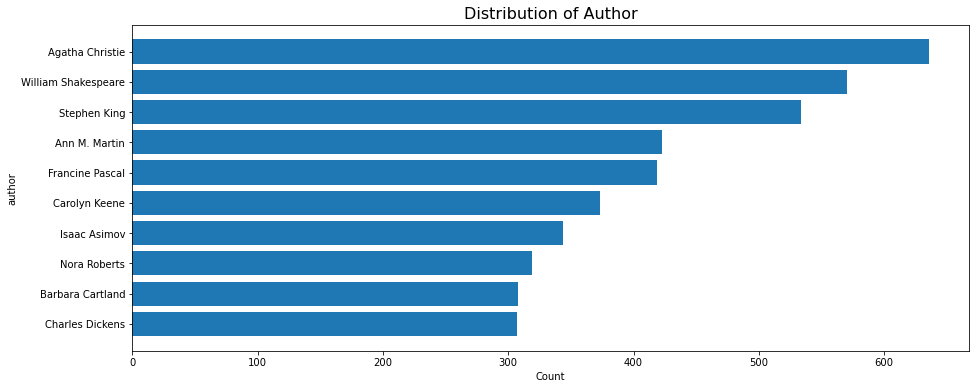

In [97]:
 univariate_plot(books_df, 'author', plot='barh')

##### Comments
> Agatha  Christie, William Shakespeare and Steven King had the highest number of books published in her lifetime.

In [146]:
author_publisher = count_table(books_df, ['author', 'publisher'], 'title', no=1000)
author_publisher.iloc[:10]

,author,publisher,count
0,Ann M. Martin,Scholastic,271
1,Francine Pascal,Sweet Valley,270
2,Nora Roberts,Silhouette,150
3,Barbara Cartland,Jove Books,146
4,Don Pendleton,Gold Eagle,146
5,Carolyn Keene,Simon Pulse,132
6,Carolyn Keene,Aladdin,121
7,Golden Books,Golden Books,120
8,R. L. Stine,Scholastic,118
9,Betty Neels,Harlequin,105


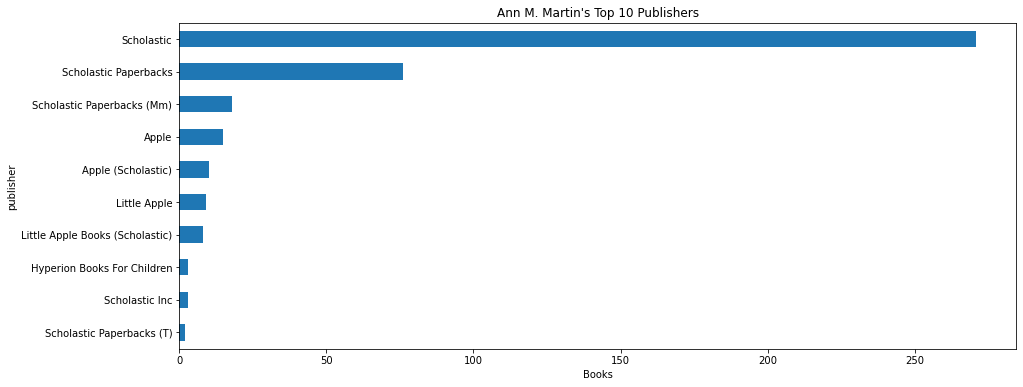

In [213]:
authors_publishers('Ann M. Martin', N=10)

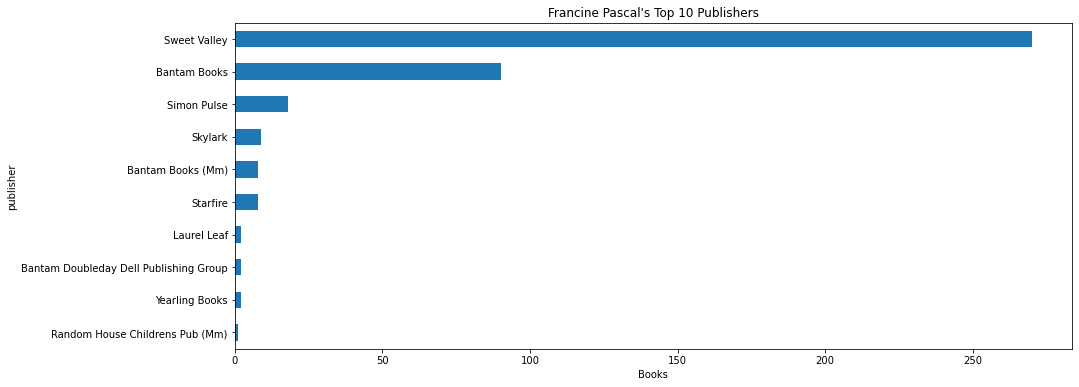

In [214]:
authors_publishers('Francine Pascal', N=10)

##### Comments
> The dataset show Ann M. Martin published the most books with Scholastic and other subsidiaries of Scholastic

>Francine Pascal stayed with Sweet Valley for 270 publications and near 100 books with Bantam Books

### 5.2 Publishers

In [35]:
count_table(books_df, ['publisher'], 'title')

,publisher,count
0,Harlequin,7536
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3648
5,Harpercollins,3370
6,Scholastic,3177
7,Simon &Amp; Schuster,2971
8,Penguin Books,2844
9,Berkley Publishing Group,2771


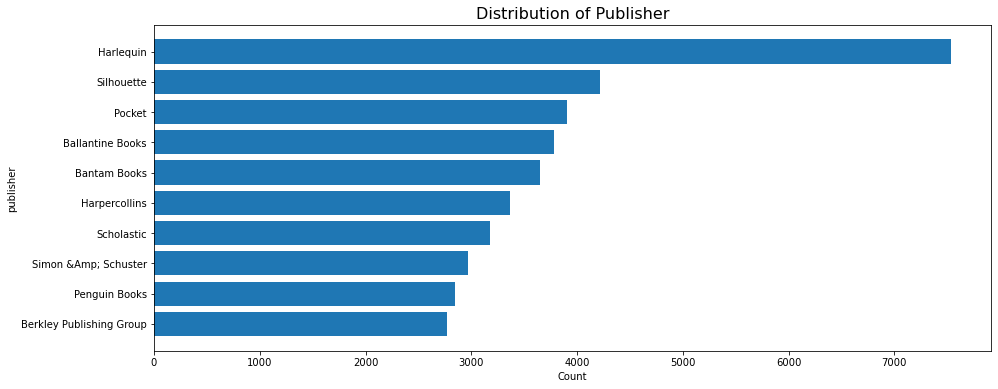

In [140]:
univariate_plot(books_df, 'publisher', plot='barh')

In [36]:
publications_per_year = count_table(books_df, ['publisher', 'year'], 'title')
publications_per_year.sort_values(by='year')

,publisher,year,count
9,Harlequin,1993,344
6,Harlequin,1996,387
7,Harlequin,1997,386
4,Harlequin,1998,403
3,Harlequin,1999,427
5,Harlequin,2000,402
2,Harlequin,2001,475
1,Harlequin,2002,521
8,Silhouette,2002,368
0,Harlequin,2003,593


##### Observation
> Harlequin Publication has the highest number of publications in total and also for a few years running.

### 5.3 Ratings

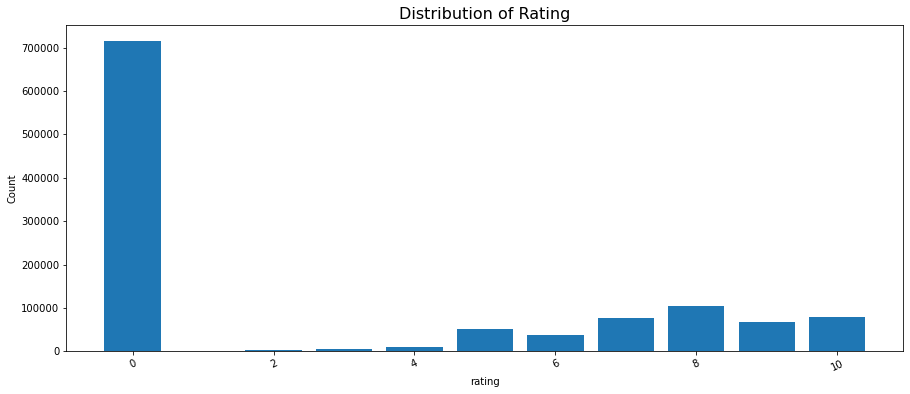

In [102]:
# ratings_df.rating.hist()
univariate_plot(ratings_df, 'rating', plot='bar')

In [40]:
# Mean Ratings
ratings_count = mean_table(merged_data, ['title'], 'rating', no=12000)['mean_rating'].value_counts()
ratings_count

mean_rating
10.000000    11616
9.500000       327
9.666667        45
9.750000         9
9.600000         2
9.800000         1
Name: count, dtype: int64

##### Observations
> Books that received an average rating of 10 were over 11,616 with a drastic fall in the ratings due to alot of the books being reviewed only once.
> Many books received a 0 rating

#### 5.3.1 Authors and Ratings

In [42]:
# Authors and their ratings 
author_rating = group_ratings('author')

In [43]:
# Sorting according the highest avg_rating
author_rating.sort_values(by='avg_rating', ascending=False)

,author,reviews,total,avg_rating
2716,Allison Hemming,1,10,10.0
3543,Andrew David,1,10,10.0
60639,Maggie Smith,1,10,10.0
13710,Chadwick Hansen,1,10,10.0
22599,Dolly Lien,1,10,10.0
...,...,...,...,...
67079,Michael Patrick Welch,1,0,0.0
67080,Michael Paul Gallagher,1,0,0.0
67081,Michael Pauls,1,0,0.0
29465,Fran Hewitt,2,0,0.0


In [44]:
# Check to ensure there are no duplicate authors in the merged_data
merged_data['author'].nunique()

98906

##### Observation

* Note that the highest rated authors only have one review.
* This causes a lot of the authors to seem highly rated. 
* We should place a threshold value of reviews given to each author to ensure the mean reviews given are more authentic.

In [45]:
# Best authors by average rating
authors_over_50_mean = group_ratings_threshold(data=author_rating, threshold=50, avg_reviews=True, reviews=False)

authors_over_50_mean

,author,avg_rating
74147,Paul Vincent,7.945455
16061,Clamp,6.553459
83638,Rumiko Takahashi,6.445783
46108,Joanne K. Rowling,6.278689
9048,Bill Amend,6.264151
35480,Harlan Ellison,6.134021
86467,Shel Silverstein,6.105820
30862,G. B. Trudeau,5.932203
81334,Robert N. Munsch,5.882353
28965,Federico Garcia Lorca,5.771930


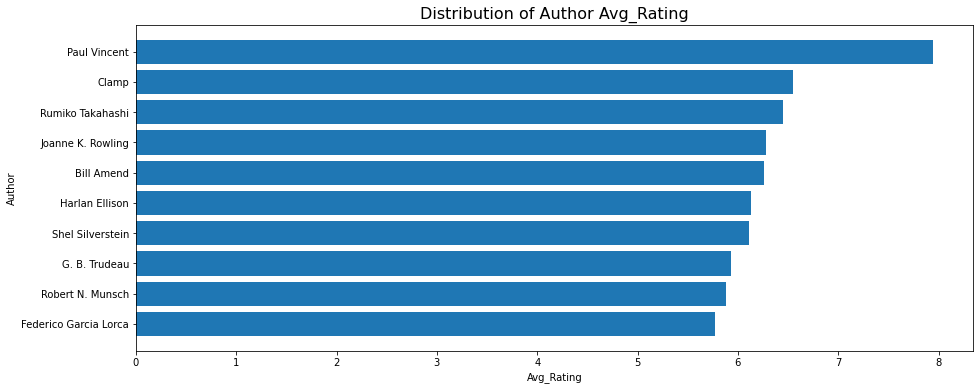

In [138]:
plot_bar(df=authors_over_50_mean, feature='avg_rating', indexes='author')

###### Observation
> - Paul Vincent, Clamp and Rumiko Takahashi have written works that received the highest average rating for their books.

In [46]:
# Best authors by Number of Reviews
authors_over_50_reviews = group_ratings_threshold(data=author_rating, threshold=50, reviews=True)
authors_over_50_reviews

,author,reviews
88399,Stephen King,10179
47471,John Grisham,8818
71170,Nora Roberts,8590
41488,James Patterson,5845
18638,Danielle Steel,5065
64340,Mary Higgins Clark,4909
20829,Dean R. Koontz,4313
66420,Michael Crichton,4277
93259,Tom Clancy,4040
5026,Anne Rice,3922


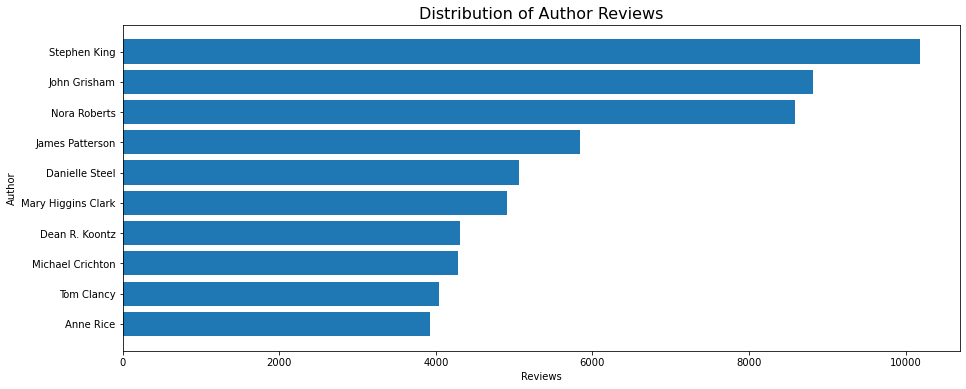

In [139]:
plot_bar(df=authors_over_50_reviews, feature='reviews', indexes='author')

##### Observation
Having a threshold of 50 reviews, the highest rated authors have now been reshuffled.
- Paul Vincent and Clamp have received the hignest mean ratings 
- Steven King and John Grisham are the publics favorite authors getting the highest readership.

***
#### 5.3.2 Books and Ratings

In [47]:
# Books and their ratings
book_rating = group_ratings(feature='title')

In [48]:
# Sorting according the highest avg_rating
book_rating.sort_values('avg_rating', ascending=False)

,title,reviews,total,avg_rating
140852,Practical Parenting Tips For The First Five Ye...,1,10,10.0
213209,The World Trade Center Remembered,1,10,10.0
181478,The Darkest Part Of The Woods,1,10,10.0
213242,The World'S Easiest Pocket Guide To Buying Ins...,1,10,10.0
96102,Jude The Obscure (Oxford World'S Classics),1,10,10.0
...,...,...,...,...
125196,Mystery Plays (Grades 4-8),1,0,0.0
168586,Sã?Â¤Mtliche Erzã?Â¤Hlungen.,1,0,0.0
168585,Sã?Â¤K'Sche Balladen.,1,0,0.0
98308,King Henry Viii (The New Cambridge Shakespeare),1,0,0.0


##### Observation

* Note that the highest rated books only have one review.
* This causes a lot of the books to seem highly rated. 
* We should place a threshold value of reviews given to each book to ensure the mean reviews given are more authentic.

In [49]:
# Best books by Number of Reviews
books_over_50_reviews = group_ratings_threshold(data=book_rating, threshold=50, reviews=True)
books_over_50_reviews

,title,reviews
231862,Wild Animus,2502
194401,The Lovely Bones: A Novel,1295
181217,The Da Vinci Code,898
5452,A Painted House,838
197383,The Nanny Diaries: A Novel,828
27521,Bridget Jones'S Diary,815
204834,The Secret Life Of Bees,774
52141,Divine Secrets Of The Ya-Ya Sisterhood: A Novel,740
202703,The Red Tent (Bestselling Backlist),723
14092,Angels & Demons,670


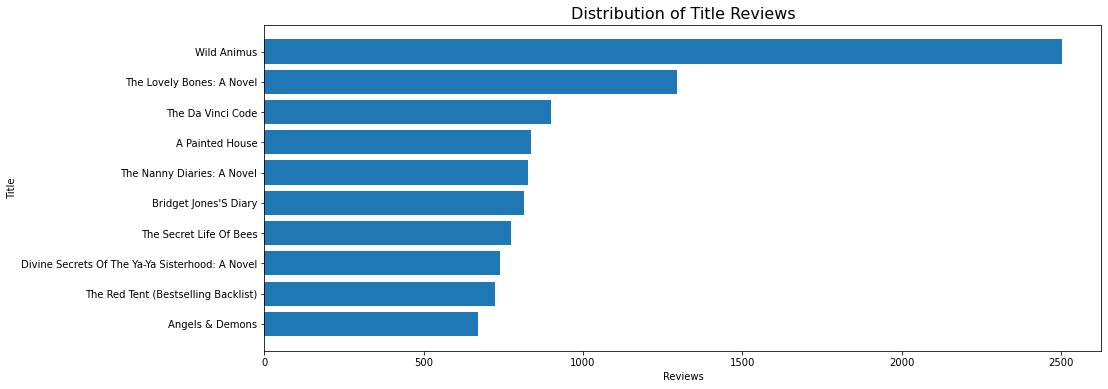

In [219]:
plot_bar(df=books_over_50_reviews, feature='reviews', indexes='title')

In [50]:
# Best books by average rating
books_over_50_mean = group_ratings_threshold(data=book_rating, threshold=50, avg_reviews=True)
books_over_50_mean

,title,avg_rating
69468,Free,8.017857
207010,The Stand (The Complete And Uncut Edition),6.175439
76809,Griffin & Sabine: An Extraordinary Correspondence,6.041667
79118,Harry Potter And The Prisoner Of Azkaban (Book 3),5.852804
79106,Harry Potter And The Goblet Of Fire (Book 4),5.824289
193726,The Little Prince,5.815603
177963,The Cat In The Hat,5.754717
79125,Harry Potter And The Sorcerer'S Stone (Book 1),5.737410
189538,The Hobbit,5.700000
79110,Harry Potter And The Order Of The Phoenix (Boo...,5.501441


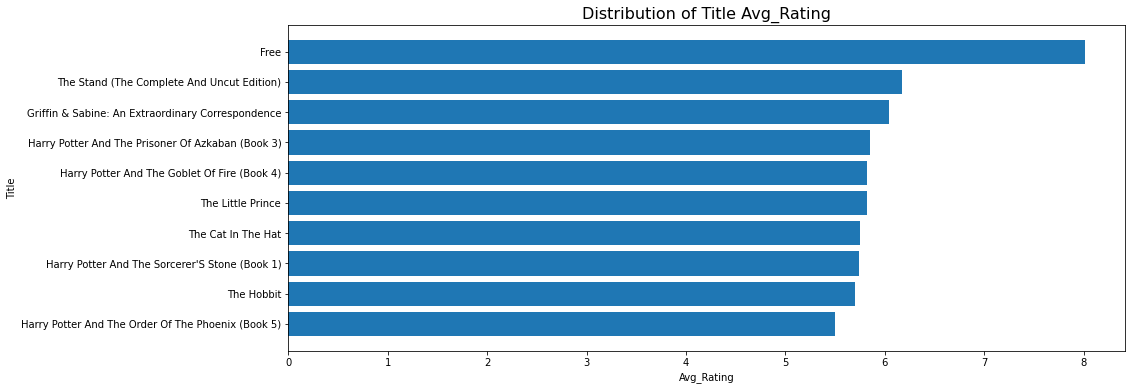

In [218]:
plot_bar(df=books_over_50_mean, feature='avg_rating', indexes='title')

##### Observation
Having a threshold of 50 reviews reveals
- Wild Animus, The Lovely Bones and The Da Vinci Code were read widely
- Free and The Stand received the highest mean ratings.

***
#### 5.3.3 Publishers and Ratings

In [51]:
# Publisher and their ratings data
publisher_rating = group_ratings(feature='publisher')

In [52]:
# Sorting according the highest avg_rating
publisher_rating.sort_values('avg_rating', ascending=False)

,publisher,reviews,total,avg_rating
0,Editions P. Terrail,1,10,10.0
11718,Potala Corporation,1,10,10.0
11899,Prop Pub Juv,1,10,10.0
773,Another Chicago Pr,1,10,10.0
774,Another Pair Of Shoes Press,1,10,10.0
...,...,...,...,...
7501,"International Institute Of Technology, Incorp",2,0,0.0
7505,International Media Corp. Ltd,1,0,0.0
7507,International Partners Press,1,0,0.0
12638,Riverwood Pub,1,0,0.0


##### Observation

* Note that the highest rated publishers only have one review.
* This causes a lot of the publishers to seem highly rated. 
* We should place a threshold value of reviews given to each publisher to ensure the mean reviews given are more authentic.

In [53]:
# Best publishers by Number of Reviews
publishers_over_50_reviews = group_ratings_threshold(data=publisher_rating, threshold=50, reviews=True)
publishers_over_50_reviews

,publisher,reviews
1346,Ballantine Books,34724
11614,Pocket,31989
1676,Berkley Publishing Group,28614
15720,Warner Books,25506
6507,Harlequin,25028
1376,Bantam Books,23605
1372,Bantam,20007
13453,Signet Book,19155
1230,Avon,17355
11241,Penguin Books,17033


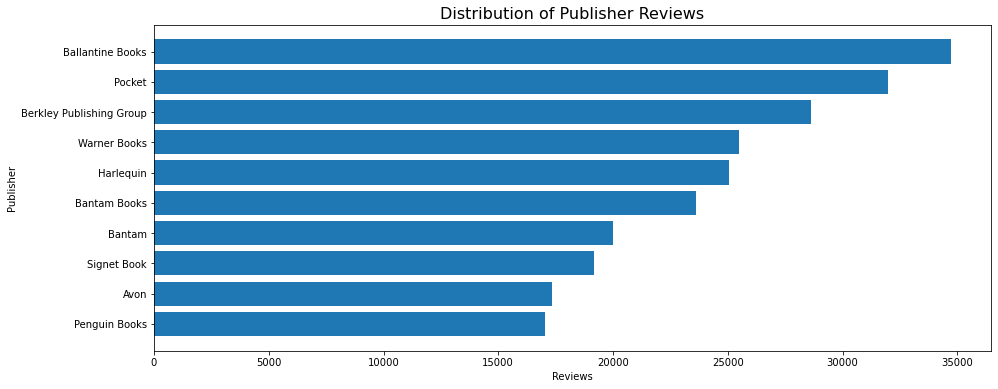

In [221]:
plot_bar(df=publishers_over_50_reviews, feature='reviews', indexes='publisher')

In [54]:
# Best publishers by average rating
publishers_over_50_mean = group_ratings_threshold(data=publisher_rating, threshold=50, avg_reviews=True)
publishers_over_50_mean

,publisher,avg_rating
5371,Five Star (Me),7.884058
2628,Carlsen Verlag Gmbh,6.940299
14728,Tokyopop,6.394175
15573,Viz Llc,6.382353
15571,Viz Communications,6.269737
7789,Jodere Group,5.909091
3802,Dc Comics,5.872928
15270,Upfront Publishing,5.867470
1635,Benedikt Taschen Verlag,5.826923
2938,Child'S World,5.781250


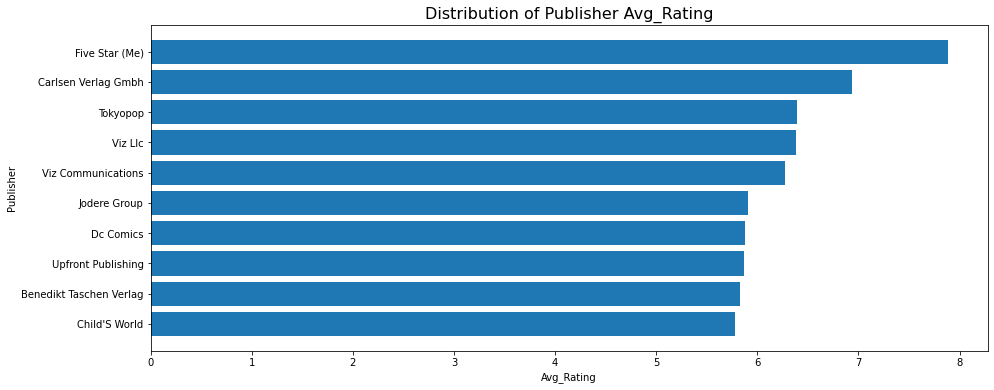

In [220]:
plot_bar(df=publishers_over_50_mean, feature='avg_rating', indexes='publisher')

##### Observation
Increasing the threshold level reveals that:
- Publishers such as Berkley Publishing Group, Pocket and Balantine Books produced books that were highly read.
- Five Star, Carlsen Verlag and Tokyopop are the Publishers whose books reveived the highest mean ratings.

***
### 5.4 Years 

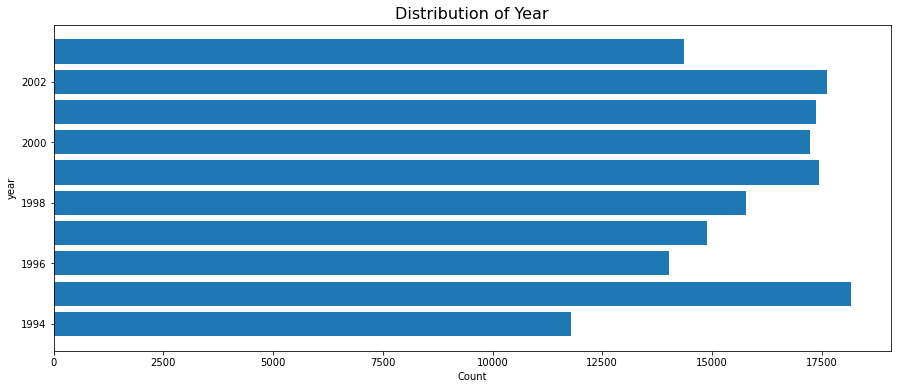

In [100]:
univariate_plot(books_df, 'year', plot='barh')

###### Observation
> - 1995 really was the year of the writer where most books were written in the year.
> - This was followed by the years 2002 and 1999

***
### 5.5 Locations

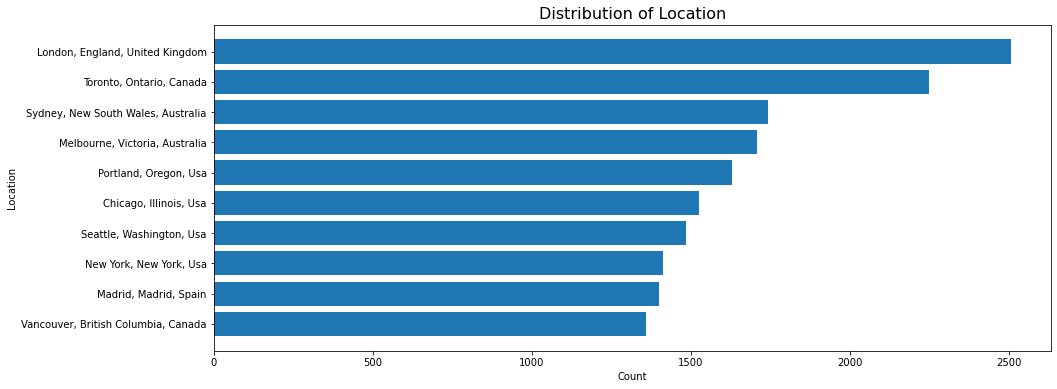

In [136]:
univariate_plot(users_df, 'Location', plot='barh')

###### Observation
> - Most of the readers who gave ratings were from London England followed by Toronto, Canada and Sydney, Autrailia

***

## Data Preprocessing

#### Maintain only top 200 contributing members in the ratings dataset

In [333]:
over_200_contribution = ratings_df['user_id'].value_counts() > 200
over_200_contribution = over_200_contribution[over_200_contribution == True].index
over_200_contribution

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

##### Observation
> Only 899 contributors have rated more that 200 books in the ratings dataset

In [334]:
rates = DataUnderstanding(name='Users')
rates_df = rates.load_data(path='./data/BX-Book-Ratings.csv')
rates_df[rates_df['User-ID'].isin(over_200_contribution) == True]['Book-Rating'].value_counts().values.sum()

526356

In [335]:
# Create a new dataframe composed of these individuals
ratings_df = ratings_df[ratings_df['user_id'].isin(over_200_contribution) == True]

# Confirm changes have worked
new_ratings = DataUnderstanding(name='New Ratings', df=ratings_df)
new_ratings.understanding()

DATA UNDERSTANDING OF THE New Ratings Dataset


SHAPE
The New Ratings dataset contains 526,356 records and 3 columns
The columns are ['ISBN', 'rating', 'user_id']


MISSING VALUES

Missing values in the New Ratings dataset:
0


DUPLICATES

Duplicate values in the New Ratings dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 1] respectively


UNIQUE VALUES

Number of unique values in user_id are 899

Some unique values in the user_id column:
[277427 277478 277639 278418    254]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

Number of unique values in ISBN are 207,291

Some unique values in the ISBN column:
['002542730X' '0026217457' '003008685X' '0030615321' '0060002050']

Top 10 Sample of the Distribution of the ISBN column
ISBN
0971880107 

#### Merging the data - Ratings and Books

In [340]:
# Confirming the common column between two dataframes
def similar_cols(df1, name1, df2, name2):
    print(f"Matching column between the {name1} and {name2} is")

    for col in df1.columns:
        if col in df2.columns:
            print(col)
            break

# Similar columns between the ratings and the books dataframes
similar_cols(ratings_df, "ratings", books_df, 'books')

Matching column between the ratings and books is
ISBN


In [341]:
# Merging the ratings with the books dataset
ratings_with_books = ratings_df.merge(right=books_df, on='ISBN')
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [342]:
# Understanding the new data
merged_rating_books = DataUnderstanding('Merged Ratings and Books', df=ratings_with_books)
merged_rating_books.understanding()

DATA UNDERSTANDING OF THE Merged Ratings and Books Dataset


SHAPE
The Merged Ratings and Books dataset contains 487,665 records and 10 columns
The columns are ['ISBN', 'Image-URL-M', 'Image-URL-S', 'author', 'img_url', 'publisher', 'rating', 'title', 'user_id', 'year']


MISSING VALUES

Missing values in the Merged Ratings and Books dataset:
0


DUPLICATES

Duplicate values in the Merged Ratings and Books dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [2, 8] respectively


UNIQUE VALUES

Number of unique values in user_id are 899

Some unique values in the user_id column:
[277427   3363  11676  12538  13552]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     11144
198711     6456
153662     5814
98391      5777
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
Name: count, dtype: int64

Number of unique values in ISBN are 178,012

Some unique values in the ISBN column:
['0

#### How many ratings does each book have?

In [343]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
num_rating.sort_values(by='rating', ascending=False)

,title,rating
154489,Wild Animus,363
18892,Bridget Jones'S Diary,277
129073,The Lovely Bones: A Novel,270
131804,The Notebook,241
132838,The Pelican Brief,236
...,...,...
92241,Practical Holiness A Second Look (Series In Pe...,1
37787,"Eine Frau, Eine Wohnung, Ein Roman",1
92239,Practical Gardening Encyclopedia,1
92238,Practical Gardener: A Guide To Breaking New Gr...,1


##### Observations
> There are some books that received less than 50 reviews. We should only focus on books with many reviews.
> Books with 1 rating would only not be sufficient enough to judge whether it was a good book.

In [344]:
# Clean the columns
num_rating.rename(columns={
    'rating': "no_of_rating"
}, inplace=True)

#### Merging the data - `ratings_with_books` with `num_ratings` table

In [345]:
# Check for similar columns
similar_cols(ratings_with_books, "ratings with books", num_rating, 'num of ratings')

Matching column between the ratings with books and num of ratings is
title


In [346]:
# Merge Datasets on 'title'
final_rating = ratings_with_books.merge(num_rating, on='title')

In [347]:
# Only keep the books with more than or equal to ratings by users
final_rating = final_rating[final_rating['no_of_rating'] >= 50]

In [348]:
complete_rating = DataUnderstanding('Final Rating', final_rating)
complete_rating.understanding()

DATA UNDERSTANDING OF THE Final Rating Dataset


SHAPE
The Final Rating dataset contains 63,336 records and 11 columns
The columns are ['ISBN', 'Image-URL-M', 'Image-URL-S', 'author', 'img_url', 'no_of_rating', 'publisher', 'rating', 'title', 'user_id', 'year']


MISSING VALUES

Missing values in the Final Rating dataset:
0


DUPLICATES

Duplicate values in the Final Rating dataset:
0


DATATYPES

Number of Features with [dtype('int64'), dtype('O')] datatypes are [3, 8] respectively


UNIQUE VALUES

Number of unique values in user_id are 888

Some unique values in the user_id column:
[277427   3363  11676  12538  13552]

Top 10 Sample of the Distribution of the user_id column
user_id
11676     1028
35859      462
76352      415
16795      396
153662     379
102967     345
230522     340
78783      331
185233     329
55492      320
Name: count, dtype: int64

Number of unique values in ISBN are 2,444

Some unique values in the ISBN column:
['002542730X' '002542730x' '0060930535' '0060934

## Modelling

### Preprocessing

#### Creating a pivot table off the final_rating dataset

In [349]:
# Pivot Table
book_pivot = final_rating.pivot_table(index='title', columns='user_id', values='rating')

# Cleaning the NaN values
book_pivot.fillna(value=0, inplace=True)

# Visualise
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1St To Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2Nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year Of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen And The Art Of Motorcycle Maintenance: An Inquiry Into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Create a sparse matrix

In [350]:
book_sparse = csr_matrix(book_pivot)

# Confirming sparse matrix was created
type(book_sparse)

scipy.sparse._csr.csr_matrix

#### Create a pivot table based on the authors

In [351]:
# Pivot Table
author_pivot = final_rating.pivot_table(index='author', columns='user_id', values='rating')

# Cleaning the NaN values
author_pivot.fillna(value=0, inplace=True)

# Visualise
print(author_pivot.head(2))

# Create a sparse matrix
author_sparse = csr_matrix(author_pivot)

# Confirmation
type(author_sparse)

# Length
len(author_pivot)

user_id           254     2276    2766    2977    3363    3757    4017    \
author                                                                     
A. Manette Ansay     0.0     0.0     0.0     0.0     0.0     0.0     9.0   
A.S. Byatt           0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user_id           4385    6242    6251    ...  274004  274061  274301  274308  \
author                                    ...                                   
A. Manette Ansay     0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
A.S. Byatt           0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   

user_id           274808  275970  277427  277478  277639  278418  
author                                                            
A. Manette Ansay     0.0     0.0     0.0     0.0     0.0     0.0  
A.S. Byatt           0.0     0.0     0.0     0.0     0.0     0.0  

[2 rows x 888 columns]


577

In [352]:
author_pivot.iloc[100,:].name, book_pivot.iloc[237,:].name

('Clancy Tom', 'Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))')

### Nearest Neighbors Model

In [353]:
# Instantiation
model = NearestNeighbors(algorithm='brute')

# Fitting
model.fit(book_sparse)

# Prediction
test_record = book_pivot.iloc[237, :].values.reshape(1, -1)
distance, suggestion = model.kneighbors(test_record, n_neighbors=6)

In [354]:
# Get the distance
distance

array([[ 0.        , 37.15171598, 37.54996671, 38.18376618, 38.32753579,
        38.58756276]])

##### Observations
> The first item is 0 meaning the model is comparing the datapoint `test_record` with itself. 
> The rest of the values are the 6 closest distances available.

In [355]:
# The suggested indexes
suggestion # array([[237, 240, 238, 241, 184, 291]], dtype=int64)

# Book values
for idx in suggestion:
    print(book_pivot.index[idx])

Index(['Guilty Pleasures (Anita Blake Vampire Hunter (Paperback))',
       'A Civil Action', 'Fatal Cure', 'Nothing Lasts Forever',
       'No Safe Place', 'Jacob Have I Loved'],
      dtype='object', name='title')


#### Modelling for the Authors

In [356]:
# Instantiation
author_model = NearestNeighbors(algorithm='brute')

# Fit
author_model.fit(author_sparse)

# Test Record
test_record = author_pivot.iloc[10, :].values.reshape(1, -1)

# Prediction
distance, suggestion = author_model.kneighbors(test_record, n_neighbors=6)

print(suggestion)

# Authors
for idx in suggestion:
    print(author_pivot.index[idx])
    
# Distance
distance

[[ 10 447 207 175 290  43]]
Index(['Alice Walker', 'Patricia Springer', 'Harold Coyle', 'Fay Weldon',
       'John Steinbeck', 'Barbara Cartland'],
      dtype='object', name='author')


array([[ 0.        , 54.0138871 , 54.18948237, 54.34611302, 54.39209501,
        54.39209501]])

## Saving the model

In [357]:
# # Get all the book names 
# book_names = book_pivot.index

# # Save all the author names
# author_names = author_pivot.index

# # Store the models in a pickle
# pickle.dump(model, open('models/book_model.pkl', 'wb'))
# pickle.dump(author_model, open('models/author_model.pkl', 'wb'))

# # Save the names of the books
# pickle.dump(book_names, open('models/book_names.pkl', 'wb'))
# pickle.dump(author_names, open('models/author_names.pkl', 'wb'))

# # Save the final ratings df
# pickle.dump(final_rating, open('models/final_rating.pkl', 'wb'))

# # Save the names of the books
# pickle.dump(book_pivot, open('models/book_pivot.pkl', 'wb'))
# pickle.dump(author_pivot, open('models/author_pivot.pkl', 'wb'))

## Recommendation

### Testing the recommendation function

In [358]:
def get_book_details(book_title):
    """Get the ISBN, author and Image URL given an exact title"""
    return final_rating[final_rating['title'] == book_title].sort_values(by='year', ascending=False)\
            .iloc[0,:][['ISBN', 'author', 'img_url']]

def get_top_author_books(author):
    """Get the author's top rated works given an exact name"""
    books =  final_rating[final_rating['author'] == author]\
                .sort_values(by='rating', ascending=False)['title'].unique()[:5]
    
    for j in books:
        print(' -',j)
    

# Book Recommender Function
def recommend_book(book_name):
    """This function takes in a book name and returns 6 suggestions"""
    # Get the book id from the book pivot table 
    book_id = np.where(book_pivot.index == book_name)[0][0]
    
    # Get the row of records from the book id
    record = book_pivot.iloc[book_id, :].values.reshape(1, -1)
    
    # Get the distance and suggestion from the book model
    distance, suggestion = model.kneighbors(record, n_neighbors=6)
    
    # Get all the books from the suggestion
    for idx in range(len(suggestion)):
        
        # Returns a list of type index
        books = book_pivot.index[suggestion[idx]]
        
        # Returns each individual item in the list
        for j in books:
            print(j)
            print("Book Details")
            print(get_book_details(j))
            print("")
            
# Book Recommender Function
def recommend_author(author_name):
    """This function takes in a book name and returns 6 suggestions"""
    # Get the book id from the book pivot table 
    author_id = np.where(author_pivot.index == author_name)[0][0]
    
    # Get the row of records from the book id
    record = author_pivot.iloc[author_id, :].values.reshape(1, -1)
    
    # Get the distance and suggestion from the book model
    distance, suggestion = author_model.kneighbors(record, n_neighbors=6)
    
    # Get all the books from the suggestion
    for idx in range(len(suggestion)):
        
        # Returns a list of type index
        authors = author_pivot.index[suggestion[idx]]
        
        # Returns each individual item in the list
        for j in authors:
            print(j)
            print(f'Highly rated books by {j} include')
            get_top_author_books(j)
            print("")

In [359]:
# Testing Book Recommendation
recommend_book('Jacob Have I Loved')

Jacob Have I Loved
Book Details
ISBN                                              0064403688
author                                    Katherine Paterson
img_url    http://images.amazon.com/images/P/0064403688.0...
Name: 104814, dtype: object

Exclusive
Book Details
ISBN                                              0446604232
author                                          Sandra Brown
img_url    http://images.amazon.com/images/P/0446604232.0...
Name: 98507, dtype: object

No Safe Place
Book Details
ISBN                                              0345404777
author                               Richard North Patterson
img_url    http://images.amazon.com/images/P/0345404777.0...
Name: 3113, dtype: object

Legacy
Book Details
ISBN                                              0373834969
author                                      Jayne Ann Krentz
img_url    http://images.amazon.com/images/P/0373834969.0...
Name: 29425, dtype: object

Pleading Guilty
Book Details
ISBN                     

In [360]:
# Testing Author Recommendation
recommend_author("Mary Higgins Clark")

Mary Higgins Clark
Highly rated books by Mary Higgins Clark include
 - Loves Music, Loves To Dance
 - Stillwatch
 - While My Pretty One Sleeps
 - Moonlight Becomes You
 - On The Street Where You Live

Golden Books
Highly rated books by Golden Books include
 - Jurassic Park

W. E. B. Griffin
Highly rated books by W. E. B. Griffin include
 - The Witness

Debra Dier
Highly rated books by Debra Dier include
 - Dangerous

Susan Grant
Highly rated books by Susan Grant include
 - Contact

Sharon K. Garner
Highly rated books by Sharon K. Garner include
 - Sanctuary



In [361]:
get_top_author_books('Mary Higgins Clark')

 - Loves Music, Loves To Dance
 - Stillwatch
 - While My Pretty One Sleeps
 - Moonlight Becomes You
 - On The Street Where You Live


In [366]:
get_book_details("On The Street Where You Live")

ISBN                                              0671004530
author                                    Mary Higgins Clark
img_url    http://images.amazon.com/images/P/0671004530.0...
Name: 117258, dtype: object

## Classes and Functions

In [368]:
class BookDetails():
    def __init__(self, book_idx=None, name=None):

        if name == None and book_idx != None:
            book_title = book_pivot.index[book_idx]
            self.df_idx = np.where(final_rating['title'] == book_title)[0][0]
        else:
            self.df_idx = np.where(final_rating['title'] == name)[0][0]

    def fetch_book(self):
        # Find the location of the book in the main df
        # Book
        return final_rating.iloc[self.df_idx]['title']

    def fetch_poster(self):
        # URLs
        return final_rating.iloc[self.df_idx]['img_url']

    def fetch_author(self):
        # URLs
        return final_rating.iloc[self.df_idx]['author']
    
class AuthorsDetails():
    def __init__(self, author_id=None, author=None):

        if author_id == None and author != None:
            self.df_idx = np.where(final_rating['author'] == author)[0][0]
        else:
            author_name = author_pivot.index[author_id]
            self.df_idx = np.where(final_rating['author'] == author_name)[0][0]

    def fetch_author(self):
        # Find the location of the book in the main df
        return final_rating.iloc[self.df_idx]['author']

    def fetch_top_rated(self):
        # Top Rated Books
        book = final_rating.iloc[self.df_idx]['title']
        return book
    
    def fetch_top_poster(self):
        poster = final_rating.iloc[self.df_idx]['img_url']
        return poster

def recommend_books(book_name):
    """This function takes a booklist of name and returns other book suggestions"""
    # Obtain the book ID
    book_id = np.where(book_pivot.index == book_name)[0][0]

    # Obtain the whole record
    record = book_pivot.iloc[book_id, :].values.reshape(1, -1)

    # Distances and suggestions
    distance, suggestion = model.kneighbors(record, n_neighbors=6)

    # Empty book list to store the books
    book_list, poster_url, authors= [], [], []

    for idx in suggestion[0]:
        book = BookDetails(idx)
        book_list.append(book.fetch_book())
        poster_url.append(book.fetch_poster())
        authors.append(book.fetch_author())

    return book_list, poster_url, authors

def recommended_author(author_name):
    """This function takes a booklist of name and returns other book suggestions"""
    # Obtain the book ID
    idx = np.where(author_pivot.index == author_name)[0][0]

    # Obtain the whole record
    record = author_pivot.iloc[idx, :].values.reshape(1, -1)

    # Distances and suggestions
    distance, suggestion = author_model.kneighbors(record, n_neighbors=6)

    # Empty book list to store the books
    authors, top_rated, details = [], [], []

    for idx in suggestion[0]:
        author = AuthorsDetails(idx)
        authors.append(author.fetch_author())
        top_rated.append(author.fetch_top_rated())
        details.append(author.fetch_top_poster())

    return authors, top_rated, details

# Tests
recommend_books('1984')

recommended_author('Mary Higgins Clark')

(['Mary Higgins Clark',
  'Golden Books',
  'W. E. B. Griffin',
  'Debra Dier',
  'Susan Grant',
  'Sharon K. Garner'],
 ["I'Ll Be Seeing You",
  'Jurassic Park',
  'The Witness',
  'Dangerous',
  'Contact',
  'Sanctuary'],
 ['http://images.amazon.com/images/P/0671888587.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/030703979X.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0515107476.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0843950382.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0505524996.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/1594140979.01.LZZZZZZZ.jpg'])